# CNN aplicado a clasificar imágenes de la base de datos MNIST
***
Ejemplo obtenido desde: https://keras.io/examples/vision/mnist_convnet/

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### MNIST dataset
****
- Revisar [MNIST](http://yann.lecun.com/exdb/mnist/)
- Problema de clasificación de imágenes
- 10 clases: 0, 1, 2, ..., 9

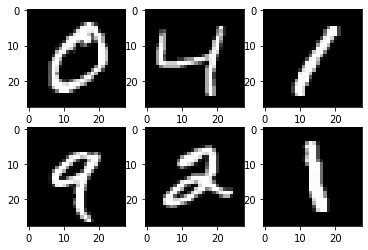

In [23]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(x_train[i], cmap="gray")
    


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 103ms/step - loss: 0.7442 - accuracy: 0.7702 - val_loss: 0.0792 - val_accuracy: 0.9793
Epoch 2/15
422/422 [==============================] - 35s 83ms/step - loss: 0.1195 - accuracy: 0.9640 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0886 - accuracy: 0.9733 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0764 - accuracy: 0.9771 - val_loss: 0.0466 - val_accuracy: 0.9860
Epoch 5/15
422/422 [==============================] - 57s 134ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0343 - val_accura

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026000699028372765
Test accuracy: 0.9921000003814697


In [54]:
prediction = model.predict(x_test)
print("La predicción para cada imagen es un vector con 10 componentes")
print(prediction[0])

La predicción para cada imagen es un vector con 10 componentes
[6.7418321e-10 6.1914661e-11 8.4837819e-07 2.5875543e-06 8.3985898e-14
 1.3051502e-10 1.1040516e-17 9.9999630e-01 5.1904947e-09 2.0279683e-07]


### Analicemos las primeras imágenes del conjunto de testing

image  1 predicts  7
image  2 predicts  2
image  3 predicts  1
image  4 predicts  0
image  5 predicts  4
image  6 predicts  1


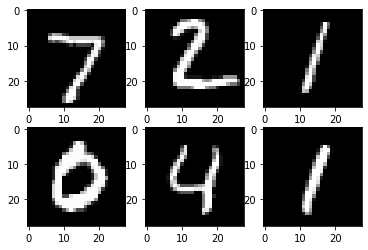

In [53]:
for i in range(1, 7):
    index_max = np.argmax(prediction[i-1,:])
    print("image ", i, "predicts ", index_max)
    plt.subplot(2, 3, i)
    plt.imshow(x_test[i-1,:,:,0], cmap="gray")